# When is the growing season? (Season with Maximum NDVI?)

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
from collections import namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.getcwd().split('/')[-1] != "vegetation_health":
    os.chdir('..')
    
assert os.getcwd().split('/')[-1] == "vegetation_health", f"Working directory should be the root (), currently: {os.getcwd()}"

# from predictor.analysis.plot_results import create_dataset_from_vars, plot_results
from predictor.analysis.utils import load_model_data

In [2]:
data_dir = Path('/Volumes/Lees_Extend/data/vegetation_health_data/')

In [23]:
ds = xr.open_dataset("/Volumes/Lees_Extend/data/ea_data/predict_vegetation_health.nc")

In [24]:
annual_cycle = ds.ndvi.groupby('time.month').mean(dim='time')
annual_cycle

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'ndvi' (month: 12, lat: 404, lon: 384)>
array([[[0.663431, 0.667381, ...,      nan,      nan],
        [0.607762, 0.614181, ...,      nan,      nan],
        ...,
        [0.1581  , 0.13595 , ...,      nan,      nan],
        [0.137262, 0.171425, ...,      nan,      nan]],

       [[0.668753, 0.678047, ...,      nan,      nan],
        [0.624065, 0.635365, ...,      nan,      nan],
        ...,
        [0.158618, 0.133376, ...,      nan,      nan],
        [0.132324, 0.170029, ...,      nan,      nan]],

       ...,

       [[0.454124, 0.458335, ...,      nan,      nan],
        [0.409841, 0.400906, ...,      nan,      nan],
        ...,
        [0.162706, 0.138971, ...,      nan,      nan],
        [0.150029, 0.172982, ...,      nan,      nan]],

       [[0.603481, 0.608712, ...,      nan,      nan],
        [0.542119, 0.558012, ...,      nan,      nan],
        ...,
        [0.153381, 0.135544, ...,      nan,      nan],
        [0.142019, 0.165794, ...,      nan,   

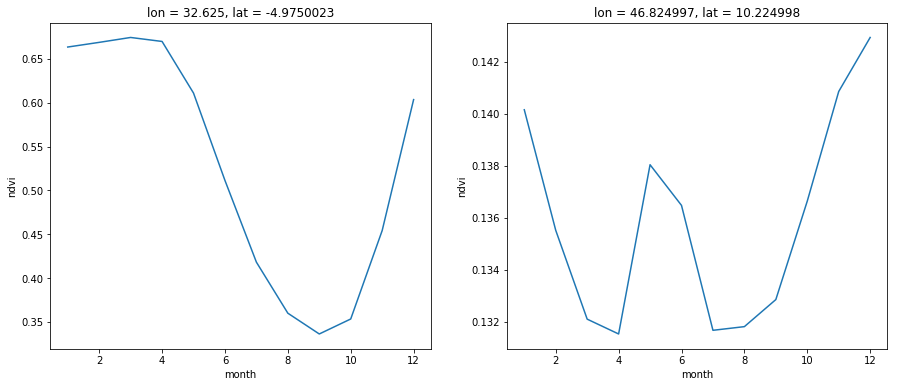

In [28]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
annual_cycle.isel(lat=0,lon=0).plot(ax=ax1)
annual_cycle.isel(lat=-100,lon=-100).plot(ax=ax2)

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/tom

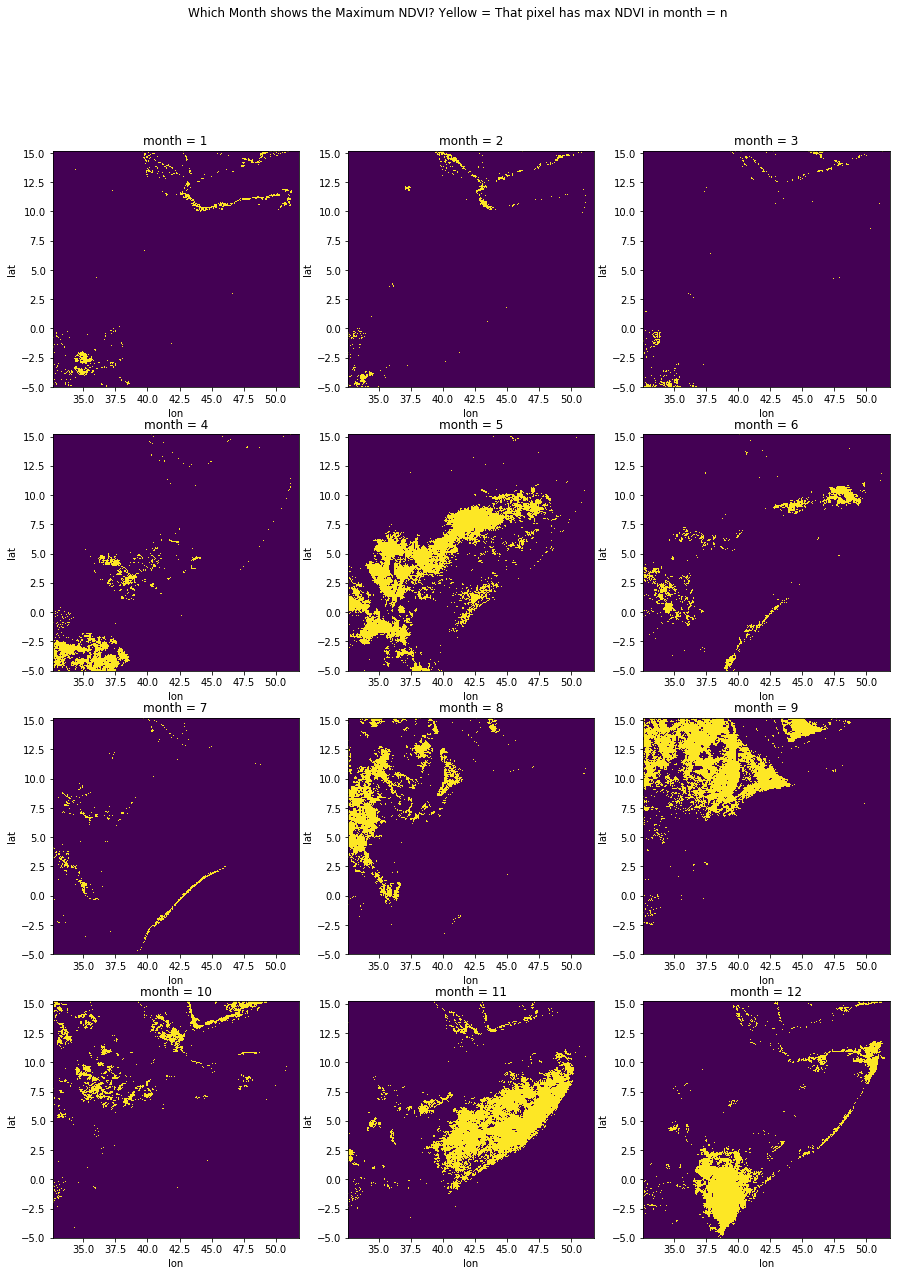

In [51]:
# what month has the maximum NDVI?
import warnings 

fig,axs = plt.subplots(4,3,figsize=(15,20))

with warnings.catch_warnings():
    for month in range(1,13):
        ax_ix=np.unravel_index(month-1,(4,3))
        ax=axs[ax_ix]
        (annual_cycle == annual_cycle.max(dim='month')).sel(month=month).plot(ax=ax,add_colorbar=False)
    fig.suptitle('Which Month shows the Maximum NDVI? Yellow = That pixel has max NDVI in month = n')
# fig.savefig('plots/.png')